# Tennis_atp analysis


In [55]:
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Définir le chemin du dossier contenant les fichiers
folder_path = "tennis_atp"

# Récupérer tous les fichiers CSV qui suivent le format "atp_matches_<année>.csv"
all_files = glob(os.path.join(folder_path, "atp_matches_*.csv"))

# Filtrer pour exclure les fichiers contenant des termes indésirables
excluded_keywords = ["doubles", "futures", "qual_chall", "amateur"]
filtered_files = [file for file in all_files if not any(keyword in file.lower() for keyword in excluded_keywords)]

# Liste pour stocker les DataFrames individuels
dataframes = []

for file in filtered_files:
    # Extraire l'année à partir du nom du fichier
    year = os.path.basename(file).split('_')[-1].split('.')[0]

    # Charger le fichier CSV
    df = pd.read_csv(file)

    # Ajouter la colonne "Year"
    df["Year"] = int(year)

    # Ajouter le DataFrame à la liste
    dataframes.append(df)

# Normalisation des colonnes : trouver toutes les colonnes présentes
all_columns = set(col for df in dataframes for col in df.columns)

# Ajouter les colonnes manquantes et réordonner les DataFrames
for i in range(len(dataframes)):
    missing_cols = all_columns - set(dataframes[i].columns)
    for col in missing_cols:
        dataframes[i][col] = pd.NA  # Remplir avec NaN
    dataframes[i] = dataframes[i][sorted(all_columns)]  # Trier les colonnes pour cohérence

# Fusionner tous les fichiers en un seul DataFrame
merged_df = pd.concat(dataframes, ignore_index=True)

In [4]:
merged_df

,Year,best_of,draw_size,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,...,winner_age,winner_entry,winner_hand,winner_ht,winner_id,winner_ioc,winner_name,winner_rank,winner_rank_points,winner_seed
0,1968,3,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,U,NaN,112411,AUS,Doug Smith,NaN,NaN,NaN
1,1968,3,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,R,NaN,126914,RSA,Louis Pretorius,NaN,NaN,NaN
2,1968,3,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,U,NaN,209523,IRL,Cecil Pedlow,NaN,NaN,NaN
3,1968,3,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.3,NaN,R,178.0,100084,NED,Tom Okker,NaN,NaN,NaN
4,1968,3,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.3,NaN,R,NaN,100132,USA,Armistead Neely,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194991,2024,3,4.0,30.0,17.0,7.0,6.0,1.0,14.0,8.0,...,18.8,NaN,U,NaN,212051,URU,Joaquin Aguilar Cardozo,1109.0,8.0,NaN
194992,2024,3,4.0,41.0,25.0,6.0,9.0,2.0,4.0,1.0,...,26.9,NaN,R,175.0,122533,VIE,Nam Hoang Ly,554.0,67.0,NaN
194993,2024,3,4.0,51.0,25.0,7.0,11.0,0.0,12.0,5.0,...,27.3,NaN,R,185.0,144748,RSA,Kris Van Wyk,416.0,109.0,NaN
194994,2024,3,4.0,51.0,32.0,17.0,14.0,5.0,9.0,5.0,...,26.9,NaN,R,175.0,122533,VIE,Nam Hoang Ly,554.0,67.0,NaN


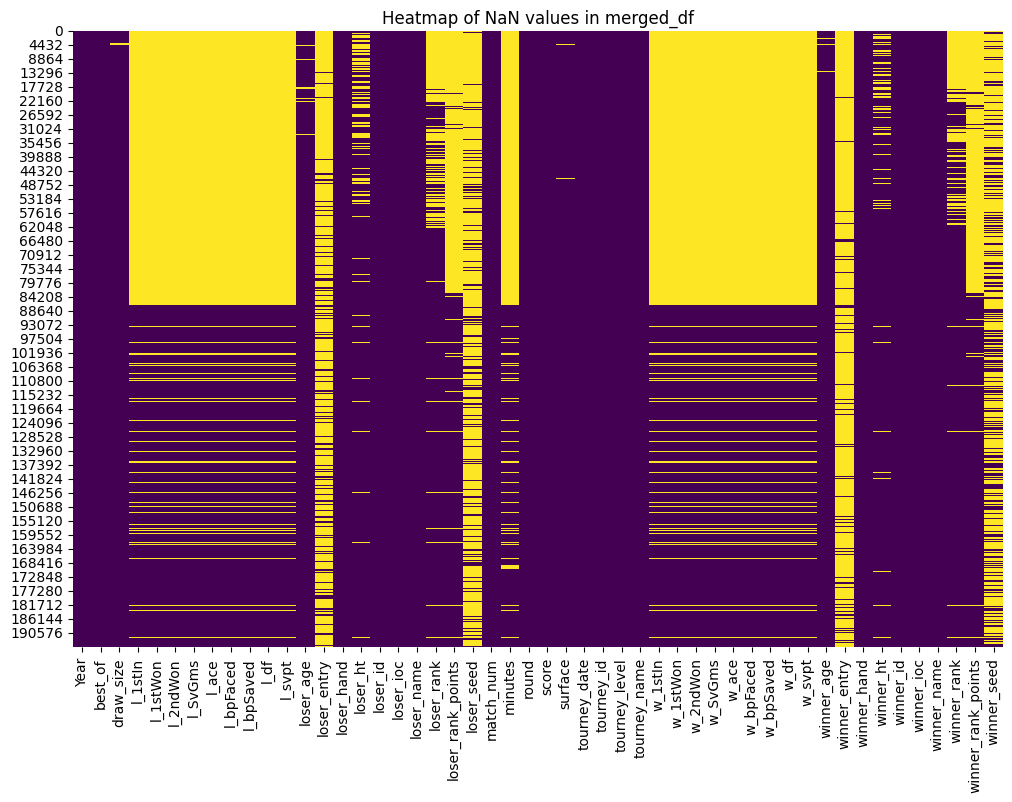

In [ ]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize NaN values
sns.heatmap(merged_df.isna(), cbar=False, cmap='viridis')

# Set the title of the plot
plt.title('Heatmap of NaN values in merged_df')

# Show the plot
plt.show()

In [23]:
# Save the merged_df DataFrame to a CSV file
merged_df.to_csv("match_tennis_68_ajd.csv", index=False)

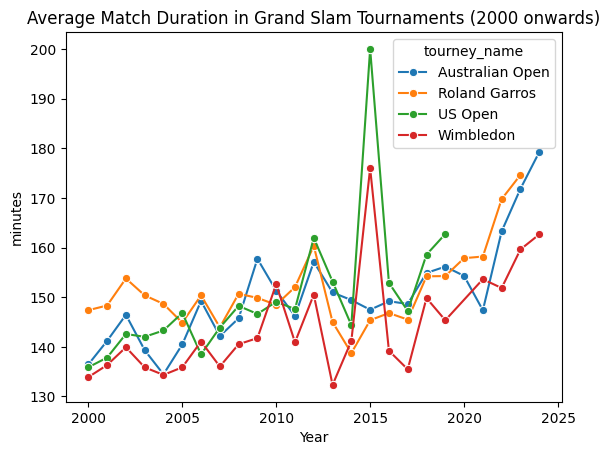

In [13]:
# Group by tourney_name and Year, then calculate the mean of minutes
minutes_by_tourney = merged_df.groupby(['tourney_name', 'Year'])['minutes'].mean().reset_index()

# Filter the data to include only the Grand Slam tournaments
filtered_minutes_by_tourney = minutes_by_tourney[minutes_by_tourney['tourney_name'].isin(['Roland Garros', 'US Open', 'Australian Open', 'Wimbledon'])]

# Filter the data to include only years from 2000 onwards
filtered_minutes_by_tourney = filtered_minutes_by_tourney[filtered_minutes_by_tourney['Year'] >= 2000]

# Plot the filtered data
sns.lineplot(data=filtered_minutes_by_tourney, x='Year', y='minutes', hue='tourney_name', marker='o')


# Set the title of the plot in English
plt.title('Average Match Duration in Grand Slam Tournaments (2000 onwards)')
plt.show()

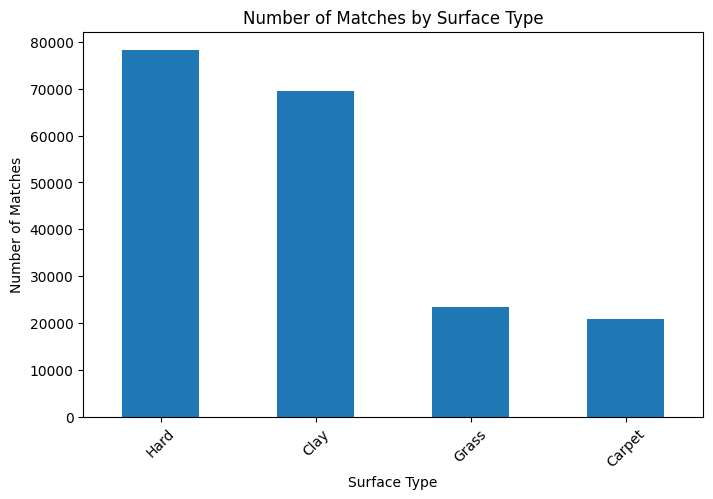

In [27]:
# Count the number of matches per surface
surface_counts = merged_df["surface"].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
surface_counts.plot(kind="bar")
plt.title("Number of Matches by Surface Type")
plt.xlabel("Surface Type")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45)
plt.show()

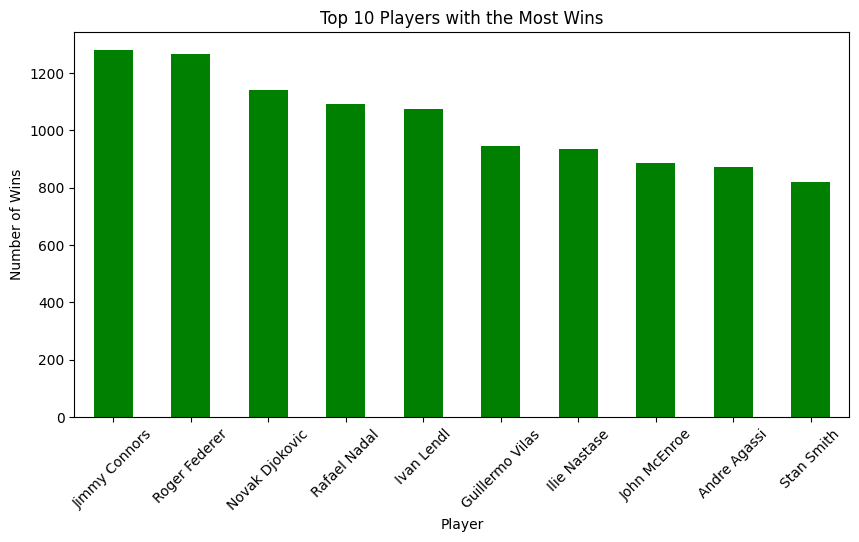

In [28]:
# Count the number of wins per player
winners = merged_df["winner_name"].value_counts().head(10)

# Plot the bar chart
plt.figure(figsize=(10, 5))
winners.plot(kind="bar", color="green")
plt.title("Top 10 Players with the Most Wins")
plt.xlabel("Player")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45)
plt.show()


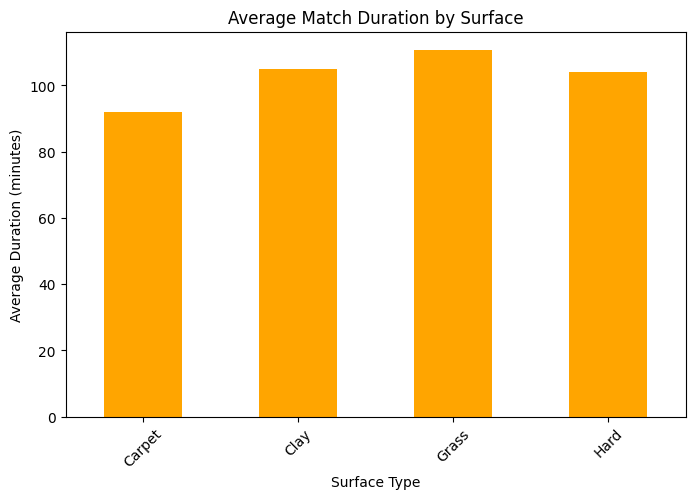

In [29]:
# Compute the average match duration by surface
avg_match_duration = merged_df.groupby("surface")["minutes"].mean()

# Plot the bar chart
plt.figure(figsize=(8, 5))
avg_match_duration.plot(kind="bar", color="orange")
plt.title("Average Match Duration by Surface")
plt.xlabel("Surface Type")
plt.ylabel("Average Duration (minutes)")
plt.xticks(rotation=45)
plt.show()


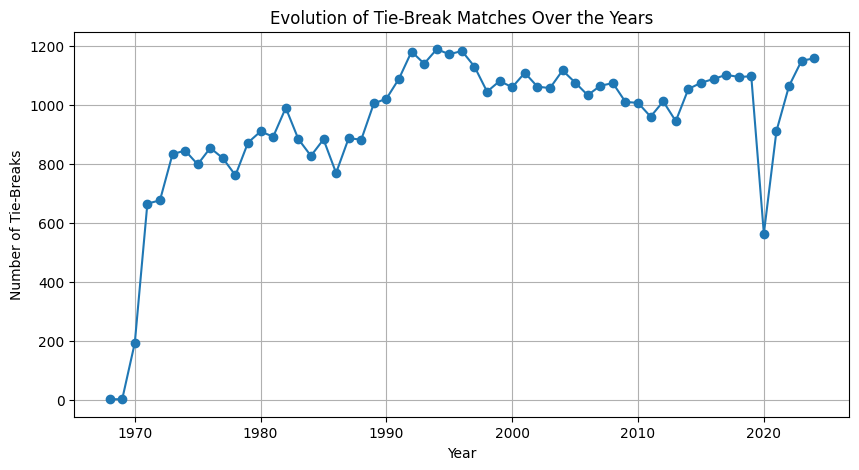

In [72]:
# Create a 'tiebreaks' column based on the 'score' column
merged_df['tiebreaks'] = merged_df['score'].fillna('').apply(lambda x: x.count('7-6'))

# Filter matches with at least one tie-break
tie_breaks_per_year = merged_df.groupby("Year")["tiebreaks"].sum()

# Plot the line chart
plt.figure(figsize=(10, 5))
plt.plot(tie_breaks_per_year.index, tie_breaks_per_year.values, marker="o", linestyle="-")
plt.title("Evolution of Tie-Break Matches Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Tie-Breaks")
plt.grid(True)
plt.show()


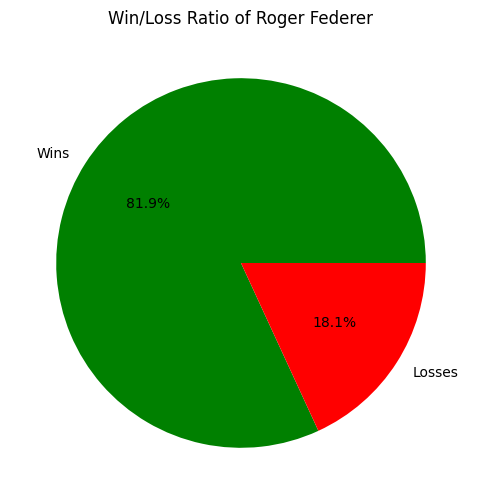

In [30]:
# Select a player
player = "Roger Federer"

# Count wins and losses
wins = (merged_df["winner_name"] == player).sum()
losses = (merged_df["loser_name"] == player).sum()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie([wins, losses], labels=["Wins", "Losses"], autopct="%1.1f%%", colors=["green", "red"])
plt.title(f"Win/Loss Ratio of {player}")
plt.show()

C:\Users\hamod\AppData\Local\Temp\ipykernel_50428\3709869054.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_sorted["Win Percentage"], y=top_10_sorted.index, palette="viridis")


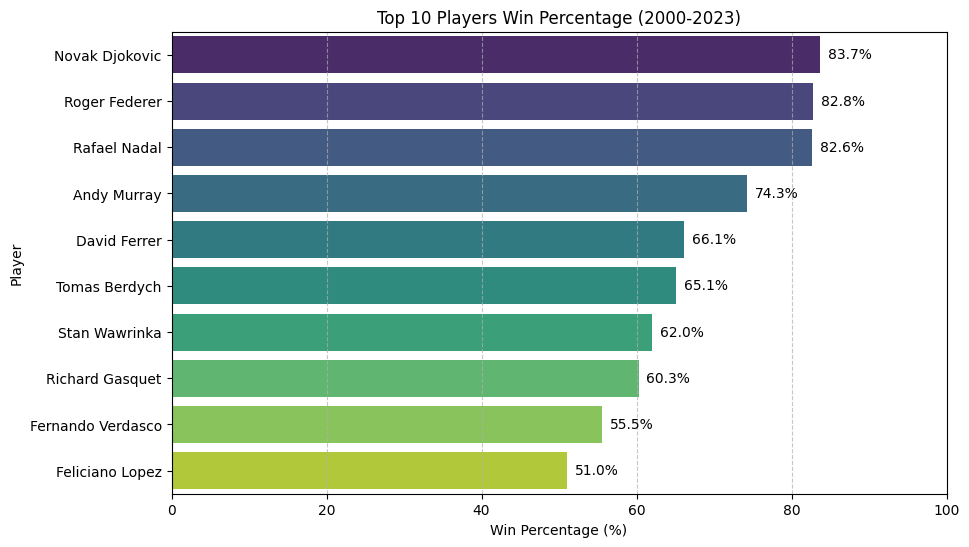

In [32]:
# Filter matches between 2000 and 2023
filtered_df = merged_df[(merged_df["Year"] >= 2000) & (merged_df["Year"] <= 2023)]

# Count the number of wins per player
wins = filtered_df["winner_name"].value_counts()

# Count the number of losses per player
losses = filtered_df["loser_name"].value_counts()

# Merge win and loss counts, filling missing values with 0
player_stats = pd.DataFrame({"Wins": wins, "Losses": losses}).fillna(0)

# Calculate win percentage
player_stats["Total Matches"] = player_stats["Wins"] + player_stats["Losses"]
player_stats["Win Percentage"] = (player_stats["Wins"] / player_stats["Total Matches"]) * 100

# Select the top 10 players based on total matches played
top_10_players = player_stats.sort_values(by="Total Matches", ascending=False).head(10)

# Sort players by win percentage
top_10_sorted = top_10_players.sort_values(by="Win Percentage", ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_sorted["Win Percentage"], y=top_10_sorted.index, palette="viridis")

# Add labels and title
plt.xlabel("Win Percentage (%)")
plt.ylabel("Player")
plt.title("Top 10 Players Win Percentage (2000-2023)")

# Display the values on the bars
for index, value in enumerate(top_10_sorted["Win Percentage"]):
    plt.text(value + 1, index, f"{value:.1f}%", va="center")

plt.xlim(0, 100)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

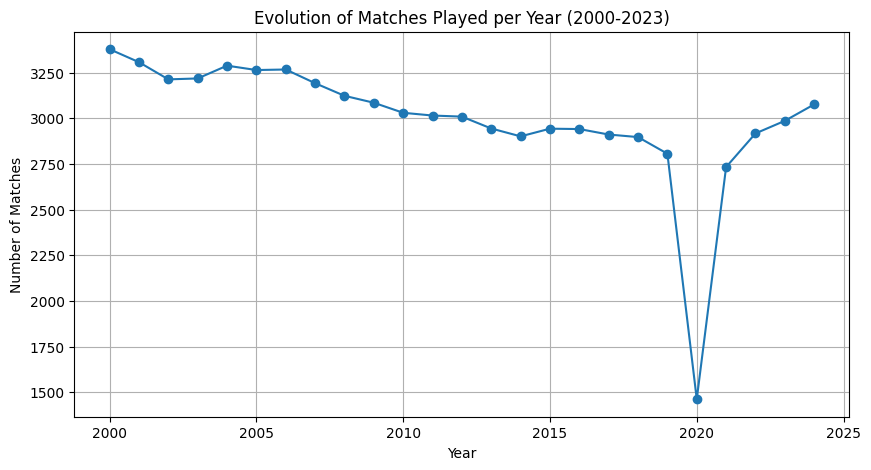

In [34]:
matches_per_year = merged_df[merged_df["Year"] >= 2000]["Year"].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(matches_per_year.index, matches_per_year.values, marker="o", linestyle="-")
plt.title("Evolution of Matches Played per Year (2000-2023)")
plt.xlabel("Year")
plt.ylabel("Number of Matches")
plt.grid(True)
plt.show()


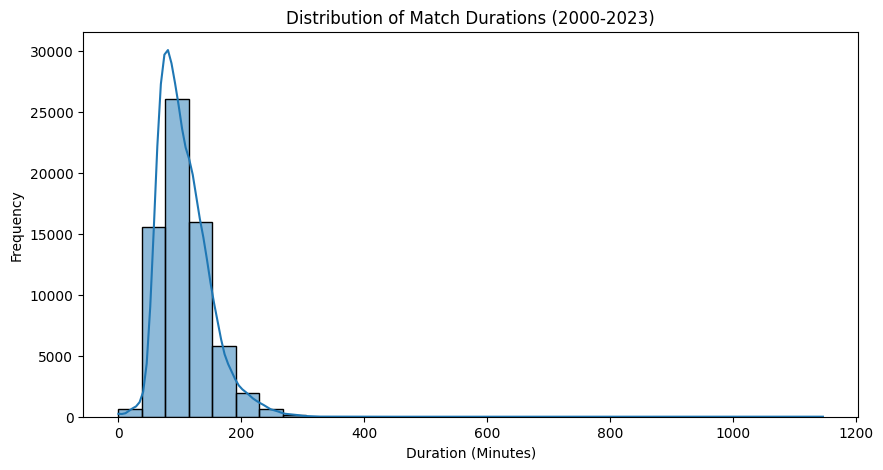

In [35]:
plt.figure(figsize=(10, 5))
sns.histplot(merged_df[merged_df["Year"] >= 2000]["minutes"].dropna(), bins=30, kde=True)
plt.title("Distribution of Match Durations (2000-2023)")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Frequency")
plt.show()


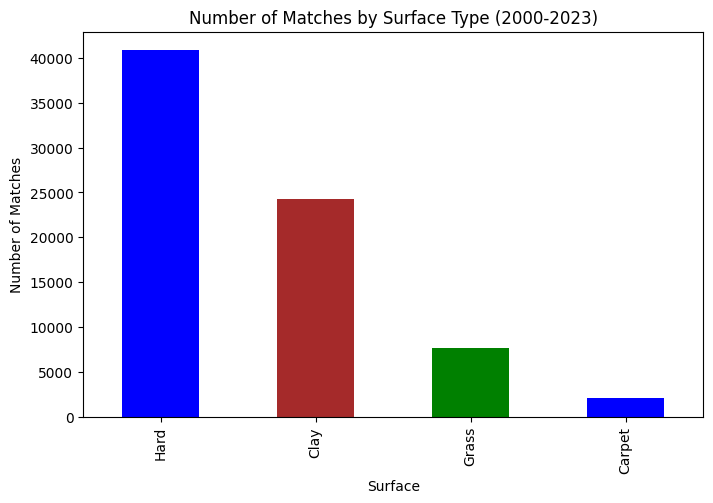

In [37]:
surface_counts = merged_df[merged_df["Year"] >= 2000]["surface"].value_counts()
plt.figure(figsize=(8, 5))
surface_counts.plot(kind="bar", color=["blue", "brown", "green"])
plt.title("Number of Matches by Surface Type (2000-2023)")
plt.xlabel("Surface")
plt.ylabel("Number of Matches")
plt.show()


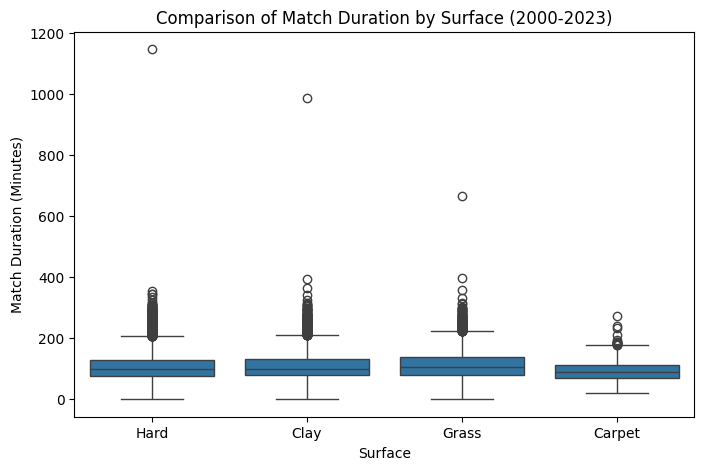

In [38]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=merged_df[merged_df["Year"] >= 2000]["surface"], 
            y=merged_df[merged_df["Year"] >= 2000]["minutes"])
plt.title("Comparison of Match Duration by Surface (2000-2023)")
plt.xlabel("Surface")
plt.ylabel("Match Duration (Minutes)")
plt.show()


C:\Users\hamod\AppData\Local\Temp\ipykernel_50428\4148422391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.values, y=top_titles.index, palette="magma")


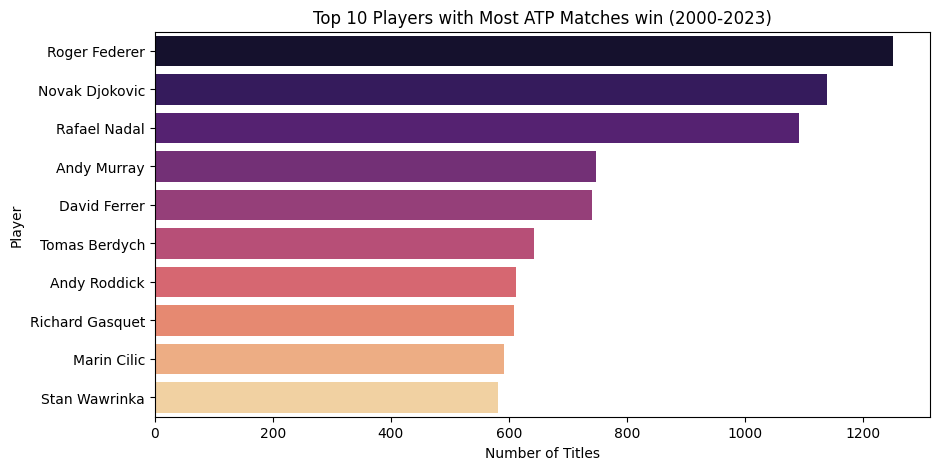

In [44]:
top_titles = merged_df[merged_df["Year"] >= 2000]["winner_name"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_titles.values, y=top_titles.index, palette="magma")
plt.title("Top 10 Players with Most ATP Matches win (2000-2023)")
plt.xlabel("Number of Titles")
plt.ylabel("Player")
plt.show()

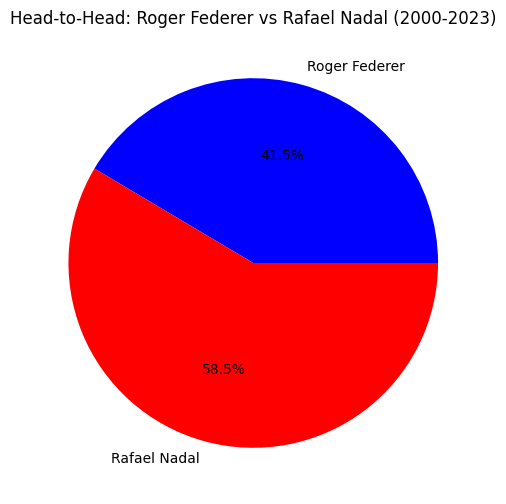

In [45]:
player1 = "Roger Federer"
player2 = "Rafael Nadal"

matches = merged_df[(merged_df["Year"] >= 2000) & 
                    (((merged_df["winner_name"] == player1) & (merged_df["loser_name"] == player2)) |
                     ((merged_df["winner_name"] == player2) & (merged_df["loser_name"] == player1)))]

wins_p1 = (matches["winner_name"] == player1).sum()
wins_p2 = (matches["winner_name"] == player2).sum()

plt.figure(figsize=(6, 6))
plt.pie([wins_p1, wins_p2], labels=[player1, player2], autopct="%1.1f%%", colors=["blue", "red"])
plt.title(f"Head-to-Head: {player1} vs {player2} (2000-2023)")
plt.show()


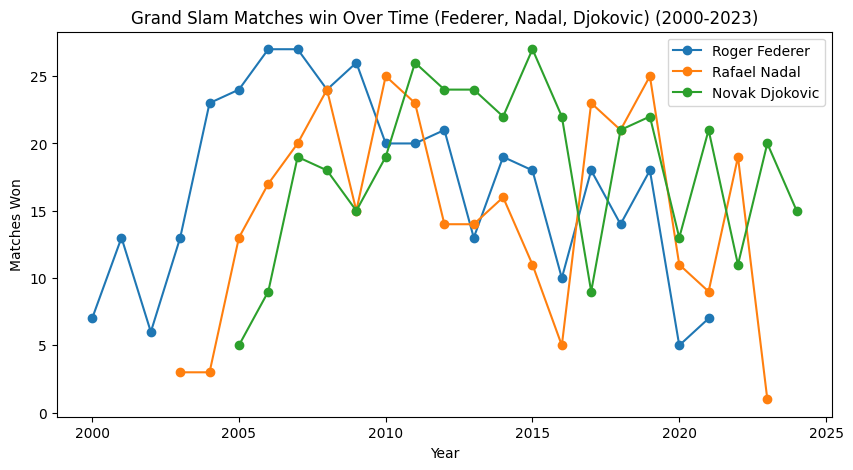

In [49]:
grand_slam_events = ["Australian Open", "Roland Garros", "Wimbledon", "US Open"]
gs_wins = merged_df[(merged_df["Year"] >= 2000) & merged_df["tourney_name"].isin(grand_slam_events)]
big3 = gs_wins[gs_wins["winner_name"].isin(["Roger Federer", "Rafael Nadal", "Novak Djokovic"])]

plt.figure(figsize=(10, 5))
for player in big3["winner_name"].unique():
    player_gs = big3[big3["winner_name"] == player]["Year"].value_counts().sort_index()
    plt.plot(player_gs.index, player_gs.values, marker="o", label=player)

plt.title("Grand Slam Matches win Over Time (Federer, Nadal, Djokovic) (2000-2023)")
plt.xlabel("Year")
plt.ylabel("Matches Won")
plt.legend()
plt.show()


<Figure size 1200x800 with 0 Axes>

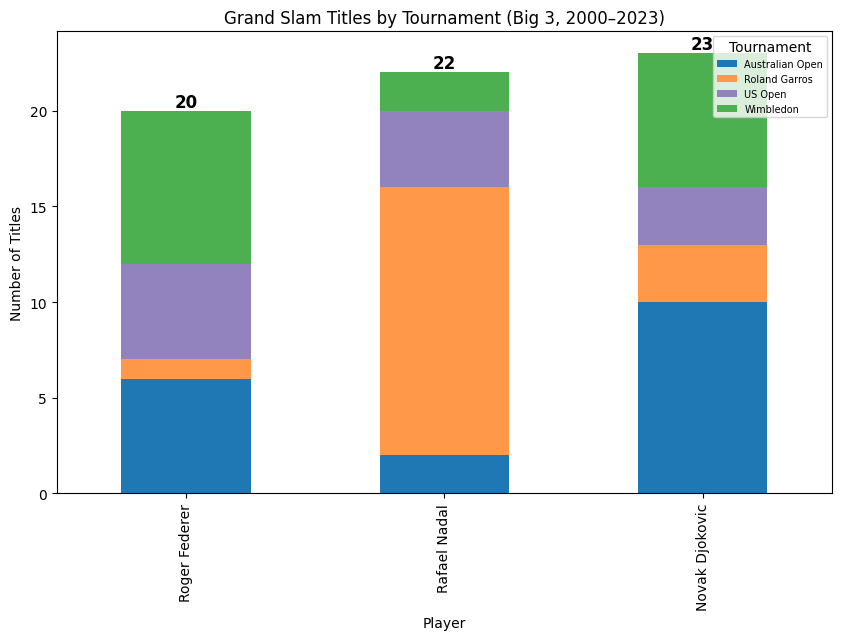

In [70]:
# Filter only Grand Slam finals from 2000 onwards
grand_slam_events = ["Australian Open", "Roland Garros", "Wimbledon", "US Open"]
big3_names = ["Roger Federer", "Rafael Nadal", "Novak Djokovic"]

# Filter finals only
gs_finals = merged_df[
    (merged_df["Year"] >= 2000) &
    (merged_df["tourney_name"].isin(grand_slam_events)) &
    (merged_df["round"] == "F") &
    (merged_df["winner_name"].isin(big3_names))
]

# Create a pivot table: rows = player, columns = tournament, values = count of wins
pivot = gs_finals.pivot_table(index="winner_name", columns="tourney_name", aggfunc="size", fill_value=0)

# Define a custom color map keeping previous colors and setting Wimbledon to green
custom_colors = {
    "Australian Open": "#1f77b4",  # Blue
    "Roland Garros": "#ff9848",  # Orange
    "US Open": "#9283be",  # Purple
    "Wimbledon": "#4CAF50"  # Green (Grass)
}

plt.figure(figsize=(12, 8))  # Augmenter la taille du plot

# Plot the stacked bar chart
pivot = pivot.reindex(big3_names)  # Ensure order
# Plot the stacked bar chart with the custom colors
pivot.plot(kind="bar", stacked=True, figsize=(10, 6), color=[custom_colors[col] for col in pivot.columns])

# Ajouter les totaux au sommet de chaque barre
total_titles = pivot.sum(axis=1)  # Calculer le total par joueur
for index, total in enumerate(total_titles):
    plt.text(index, total, str(int(total)), ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

# Title and labels
plt.title("Grand Slam Titles by Tournament (Big 3, 2000–2023)")
plt.xlabel("Player")
plt.ylabel("Number of Titles")
plt.legend(title="Tournament", fontsize=7, title_fontsize=10)  # Taille du texte réduiteplt.tight_layout()
plt.show()
